# Remote Data Parsing: Analyzing the Influence of Solar Flare Classes on Peak Flux in the PSEP >100 MeV Channel with the dmLab Module
Written by India Jackson, PhD. This Jupyter Notebook module, `dmLab`, facilitates easy access to various datasets stored on an AWS S3 bucket for Georgia State University's Data Mining Lab. The module streamlines fetching datasets for analysis in your Python environment.

This module was developed as a requirement for my PhD in Astrophysics and MS in Computer Science at Georgia State University.


## Introduction
Solar flares are intense bursts of radiation from the Sun, and they are categorized into different classes based on their X-ray intensity. These classes are denoted as A, B, C, M, or X, representing increasing levels of intensity. In this analysis, we aim to understand how the solar flare classes of C, M, and X correlates with the particle flux (ppf100MeV), which measures the flux of particles with energy greater than 100 MeV.

## Usage
To perform this analysis, we utilize the dmLab module to access the GSEP (Integrated Geostationary Solar Energetic Particle Events Catalog) dataset. We start by cleaning the data to remove missing values and ensure data integrity. Next, we convert the 'ppf_gt100MeV' column to numeric format and extract the flare class letter from the 'fl_goes_class' column.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dmLab as data

In [17]:
df = data.get_dataset('gsep_list').copy()
print(df.columns)

Index(['sep_index', 'pp_index', 'cdaw_sep_id', 'timestamp', 'cdaw_start_time',
       'cdaw_max_time', 'cdaw_evn_max', 'cme_id', 'cme_launch_time',
       'cme_1st_app_time', 'lasco_cme_width', 'p_cme_width',
       'lasco_linear_speed', 'p_cme_speed', 'fl_id', 'fl_start_time',
       'fl_peak_time', 'fl_rise_time', 'fl_lon', 'fl_lat', 'fl_goes_class',
       'noaa_ar', 'noaa_ar_uncertain', 'harpnum', 'noaa_pf10MeV',
       'ppf_gt10MeV', 'ppf_gt30MeV', 'ppf_gt60MeV', 'ppf_gt100MeV',
       'fluence_gt10MeV', 'fluence_gt30MeV', 'fluence_gt60MeV',
       'fluence_gt100MeV', 'gsep_pf_gt10MeV', 'gsep_max_time',
       'gsep_fluence_gt10MeV', 'm_type2_onset_time', 'dh_type2_onset_time',
       'start_fr', 'noaa-sep_flag', 'Inst_category', 'Comments', 'Notes',
       'Fe_e_p_shock_notes', 'gsep_notes', 'slice_start', 'slice_end', 'Flag'],
      dtype='object')


In [18]:
# Clean the data by removing rows with missing values in 'fl_goes_class' and 'ppf_gt100MeV' columns
df = df.dropna(subset=['fl_goes_class', 'ppf_gt100MeV'])

In [19]:
# Convert the 'ppf_gt100MeV' column to numeric
df.loc[:, 'ppf_gt100MeV'] = pd.to_numeric(df['ppf_gt100MeV'], errors='coerce')

In [20]:
# Extract the flare class letter (C, M, or X) from the 'fl_goes_class' column and create a new column
df.loc[:, 'flare_class'] = df['fl_goes_class'].str.extract(r'([CMX])')[0]

In [21]:
# Group the data by 'flare_class' and calculate the mean of 'ppf_gt100MeV' for each class
flare_class_means = df.groupby('flare_class')['ppf_gt100MeV'].mean()

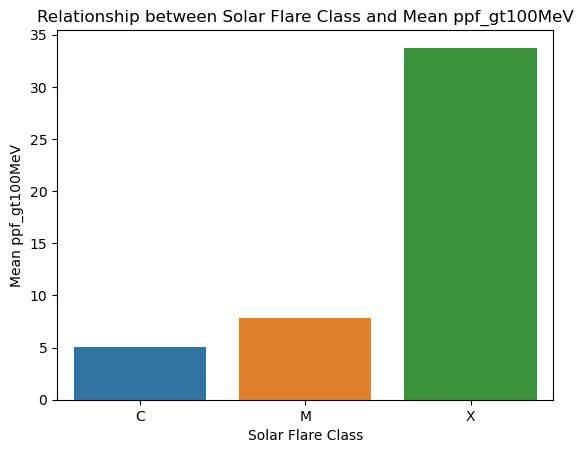

In [22]:
# Plot the relationship between solar flare class and the mean of 'ppf_gt100MeV'
sns.barplot(x=flare_class_means.index, y=flare_class_means.values)
plt.xlabel('Solar Flare Class')
plt.ylabel('Mean ppf_gt100MeV')
plt.title('Relationship between Solar Flare Class and Mean ppf_gt100MeV')
plt.show()